# Project: Melbourne Housing - [Kaggle-tutorial]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Decision Tree">Decision Tree</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Content
> **Tip**: This is a snapshot of a [dataset created by Tony Pino](https://www.kaggle.com/anthonypino/melbourne-housing-market).
It was scraped from publicly available results posted every week from Domain.com.au. He cleaned it well, and now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.
In most cities, the #### central business district represents an important part of the local commercial real estate market

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/data?select=melb_data.csv). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

#### Data Dictionary

01 - Suburb: Suburb

02 - Address: Address

03 - Rooms: Number of rooms

04 - Price: Price in Australian dollars

05 - Method:
        S - property sold;
        SP - property sold prior;
        PI - property passed in;
        PN - sold prior not disclosed;
        SN - sold not disclosed;
        NB - no bid;
        VB - vendor bid;
        W - withdrawn prior to auction;
        SA - sold after auction;
        SS - sold after auction price not disclosed.
        N/A - price or highest bid not available.

06 - Type:
        br - bedroom(s);
        h - house,cottage,villa, semi,terrace;
        u - unit, duplex;
        t - townhouse;
        dev site - development site;
        o res - other residential.
   
07 - SellerG: Real Estate Agent

08 - Date: Date sold

09 - Distance: Distance from CBD in Kilometres.... central business district (the CBD) is the major business hub of the city. Some of the most notable skyscrapers, shopping malls

10 - Regionname: General Region (West, North West, North, North east …etc)

11 - Propertycount: Number of properties that exist in the suburb.

12 - Bedroom2 : Scraped # of Bedrooms (from different source)

13 - Bathroom: Number of Bathrooms

14 - Car: Number of carspots

15 - Landsize: Land Size in Metres

16 - BuildingArea: Building Size in Metres
 
17 - YearBuilt: Year the house was built

18 - CouncilArea: Governing council for the area

19 - Lattitude: Self explanitory

20 - Longtitude: Self explanitory

The first number is always the latitude and the second is the longitude. It easy to remember which is which if you think of the two coordinates in alphabetical terms: latitude comes before longitude in the dictionary. For example, the Empire State Building lies at 40.748440°, -73.984559°.[here](https://www.thoughtco.com/difference-between-latitude-and-longitude-4070791#:~:text=The%20first%20number%20is%20always%20the%20latitude%20and,the%20Empire%20State%20Building%20lies%20at%2040.748440%C2%B0%2C%20-73.984559%C2%B0.)

### Acknowledgements

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

In [107]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


Data Wrangling which include :
    1.Gathering Data
    2.Assessing Data
    3.cleaning Data

### Gathering Data

In [108]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('melb_data.csv')


we aqucistion data from dataset like : csv file in our example

In [109]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


we use head() or tail() function to display a sample of data 

In [110]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


### Assessing Data 

We assessing our data using some function like : shape , ndim , dtypes , size  , info() , nunique() , isnull()

In [111]:
# return number of columns and number of row
df.shape

(13580, 21)

the shape function get number of rows and number of columns in tuple

In [112]:
#return number of dimensions of data
df.ndim

2

In [113]:
#return types of each column
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

dtypes show us data type of each column (features)

In [114]:
# return size of Dataset which is a multiplication of number of rows and number of columns
df.size

285180

size function show us the result of multiplication of number of rows and number of columns

In [115]:
#return number of non-null-value and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


info() function show us number of non_null_value in each column and datatype

it has two features(no of non_null_value,datatype)

In [116]:
#return number of unique value
df.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

nunique() show us number of unique values in each column

In [117]:
# return which value is nul or not for each element in DataSet 
df.isnull()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


isnull() function show us boolean value for each element (each cell) it is null or not

if it(element) null return True

else  return False

In [118]:
# return which value is nul or not for each columns in DataSet 
df.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car               True
Landsize         False
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

isnull().any() function show us boolean value for each column it is null or not

if column null return True

else  return False

In [119]:
#return number of columns has a null value
df.isnull().any().sum()

4

In [120]:
#return number of null value for each column
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

isnull().any() function show us boolean value for each column it is null or not

if column null return 1

else  return 0

In [121]:
#return a number of cell has a null value
df.isnull().sum().sum()

13256

In [122]:
df.Bedroom2

0        2.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
13575    4.0
13576    3.0
13577    3.0
13578    4.0
13579    4.0
Name: Bedroom2, Length: 13580, dtype: float64

In [123]:
df.Car

0        1.0
1        0.0
2        0.0
3        1.0
4        2.0
        ... 
13575    2.0
13576    2.0
13577    4.0
13578    5.0
13579    1.0
Name: Car, Length: 13580, dtype: float64

In [124]:
#return statistical descriptive of dataset for each column
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


The results show 8 numbers for each column in your original dataset. The first number, the count, shows how many rows have non-missing values.

Missing values arise for many reasons. For example, the size of the 2nd bedroom wouldn't be collected when surveying a 1 bedroom house. We'll come back to the topic of missing data.

The second value is the mean, which is the average. Under that, std is the standard deviation, which measures how numerically spread out the values are.

To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

In [125]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What factors are important for us to know in order to predict house price? Exploraty Data Analysis 

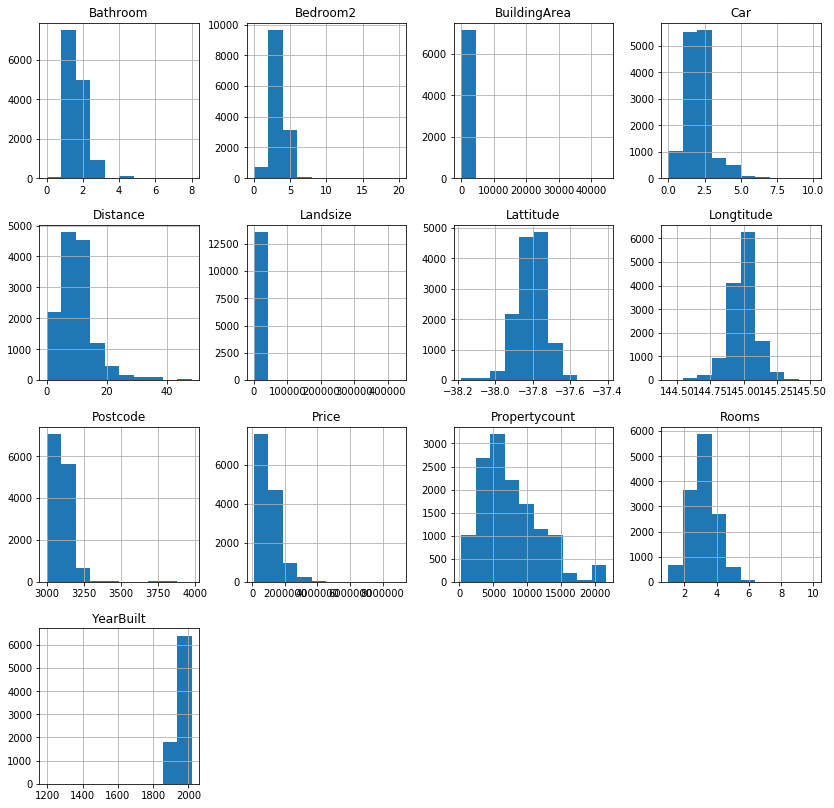

In [126]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize = (14,14));

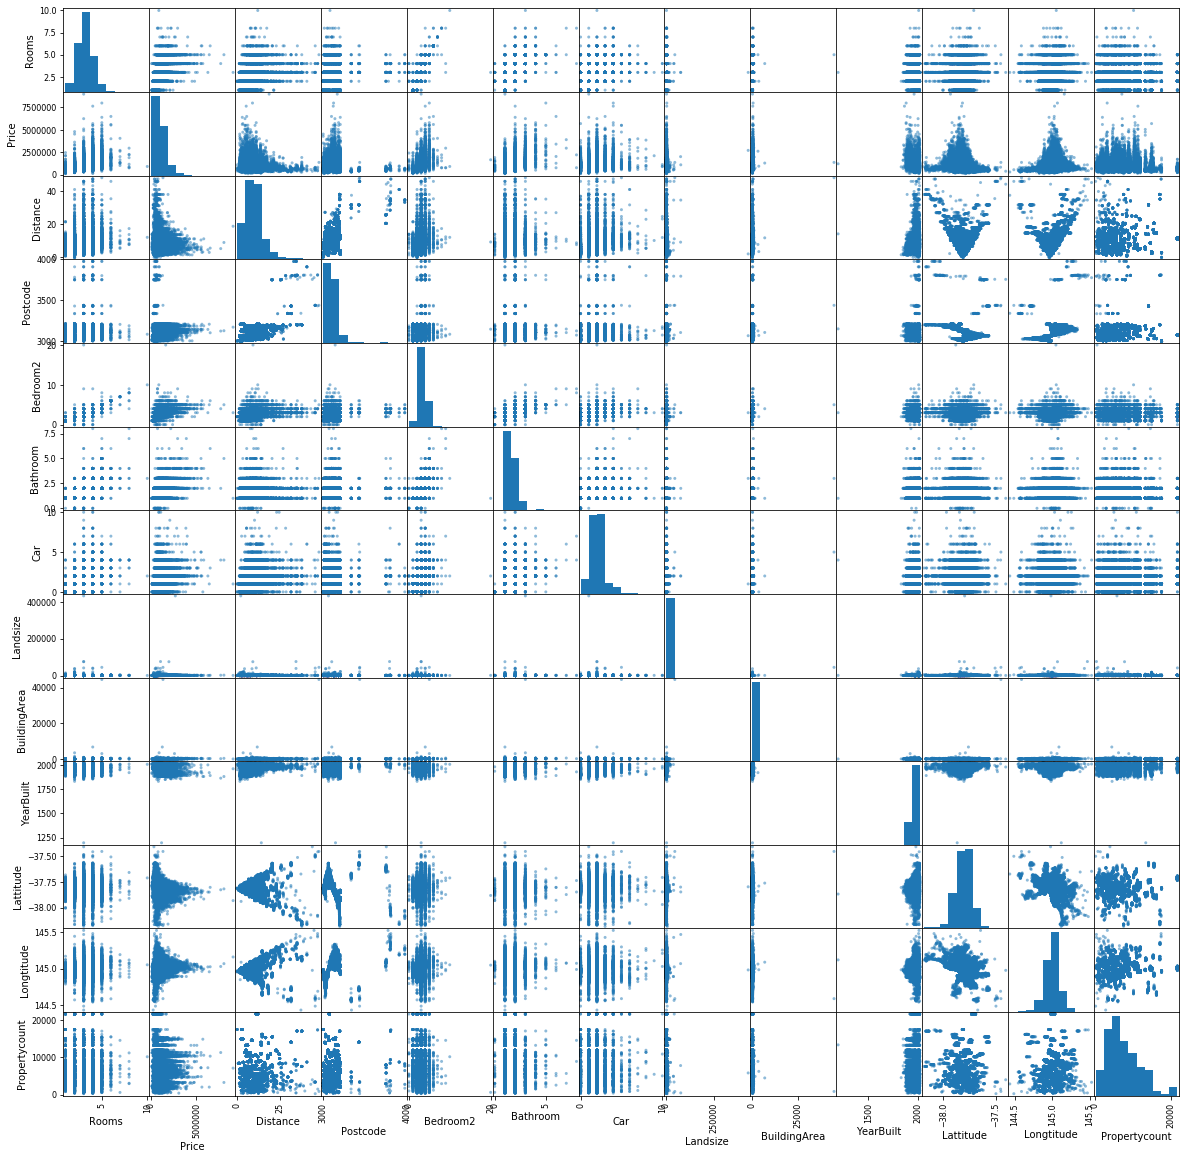

In [127]:
pd.plotting.scatter_matrix(df, figsize = (20,20));

# No cleaning data

## Filtering

In [128]:
# dropna drops missing values (think of na as "not available") 
# axis = 0 horizontal
df = df.dropna(axis=0)
#df.dropna(axis=0 , inplace = True)

link between price and other features

<a id='Decision Tree'></a>
# Decision Tree


### Choosing "Features"

"features" : The columns that are inputted into our model (and later used to make predictions)

 In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.



In [129]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude','Propertycount','Distance','BuildingArea', 'YearBuilt']

In [130]:
#first parameter
x = df[features]

In [131]:
x.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Propertycount,Distance,BuildingArea,YearBuilt
1,2,1.0,156.0,-37.8079,144.9934,4019.0,2.5,79.0,1900.0
2,3,2.0,134.0,-37.8093,144.9944,4019.0,2.5,150.0,1900.0
4,4,1.0,120.0,-37.8072,144.9941,4019.0,2.5,142.0,2014.0
6,3,2.0,245.0,-37.8024,144.9993,4019.0,2.5,210.0,1910.0
7,2,1.0,256.0,-37.8060,144.9954,4019.0,2.5,107.0,1890.0


In [132]:
x.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Propertycount,Distance,BuildingArea,YearBuilt
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201,7435.489509,9.751097,141.568645,1964.081988
std,0.971079,0.711362,897.449881,0.075850,0.099165,4337.698917,5.612065,90.834824,38.105673
min,1.000000,1.000000,0.000000,-38.164920,144.542370,389.000000,0.000000,0.000000,1196.000000
25%,2.000000,1.000000,152.000000,-37.855438,144.926198,4383.750000,5.900000,91.000000,1940.000000
50%,3.000000,1.000000,373.000000,-37.802250,144.995800,6567.000000,9.000000,124.000000,1970.000000
75%,4.000000,2.000000,628.000000,-37.758200,145.052700,10175.000000,12.400000,170.000000,2000.000000
max,8.000000,8.000000,37000.000000,-37.457090,145.526350,21650.000000,47.400000,3112.000000,2018.000000


### Selecting The Prediction Target

In [133]:
#second parameter
y = df.Price

# Building Your Model
You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

    Define  : What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model                    
              type are specified too.
    Fit     : Capture patterns from provided data. This is the heart of modeling.
    Predict : Just what it sounds like
    Evaluate: Determine how accurate the model's predictions are.
Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [151]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
df_model = DecisionTreeRegressor(random_state=1);

# Fit model
df_model.fit(x, y);

In [135]:
df_model.score(x,y)

0.9999039524703651

# New record


In [136]:
df_test = pd.read_csv("Melbourne_housing_FULL.csv")

In [137]:
df_test = df_test.dropna(axis=0)

In [138]:
y_df_test = df_test.Price

In [139]:
features_test =  ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude','Propertycount','Distance','BuildingArea', 'YearBuilt']

In [140]:
x_df_test = df_test[features_test]

In [141]:
df_model.score(x_df_test,y_df_test)

0.865434363279177

### prediction

In [142]:
#prediction
print("Making predictions for the following 5 houses:")
print(x.head())

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude  Propertycount  Distance  \
1      2       1.0     156.0   -37.8079    144.9934         4019.0       2.5   
2      3       2.0     134.0   -37.8093    144.9944         4019.0       2.5   
4      4       1.0     120.0   -37.8072    144.9941         4019.0       2.5   
6      3       2.0     245.0   -37.8024    144.9993         4019.0       2.5   
7      2       1.0     256.0   -37.8060    144.9954         4019.0       2.5   

   BuildingArea  YearBuilt  
1          79.0     1900.0  
2         150.0     1900.0  
4         142.0     2014.0  
6         210.0     1910.0  
7         107.0     1890.0  


#### using prediction functon (df.predict())

In [143]:
#prediction for 1st five element
print("The predictions are")
print(df_model.predict(x.head()))

The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


# Model Validation

will the model's predictions be close to what actually happens?

Many people make a huge mistake when measuring predictive accuracy. They make predictions with their training data and compare those predictions to the target values in the training data. You'll see the problem with this approach and how to solve it in a moment, but let's think about how we'd do this first.

### sample

You'd first need to summarize the model quality into an understandable way. If you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

###  Mean Absolute Error MAE

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error.

In [144]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = df_model.predict(x)

'''
    The prediction error for each house is:
    
        error = actual−predicted
        
        Absolute error = |actual−predicted|
        
        Mean Absolute Error(MAE)  = Sum(|actual−predicted|)/num
        
'''
mean_absolute_error(y, predicted_home_prices)

434.71594577146544

### The Problem with "In-Sample" Scores¶

Imagine that, in the large real estate market, door color is unrelated to home price.

#### validation data
    some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before

In [145]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
#train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.3)

In [146]:
df_model.fit(train_x, train_y);
val_pred = df_model.predict(val_x)

In [147]:
val_pred

array([2200000., 2255000., 1025000., ...,  407500.,  565000.,  540000.])

In [148]:
len(train_x)

4337

# Underfitting and Overfitting

Conclusion
Here's the takeaway: Models can suffer from either:

    Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions
##### where a model matches the training data almost perfectly, but does poorly in validation and other new data.                     
    
    Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.
##### When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data
    
We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:

In [153]:
def get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_x, train_y)
    preds_val = model.predict(val_x)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

We can use a for-loop to compare the accuracy of models built with different values for max_leaf_nodes.

In [154]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  341881
Max leaf nodes: 50  		 Mean Absolute Error:  240949
Max leaf nodes: 500  		 Mean Absolute Error:  232351
Max leaf nodes: 5000  		 Mean Absolute Error:  245275


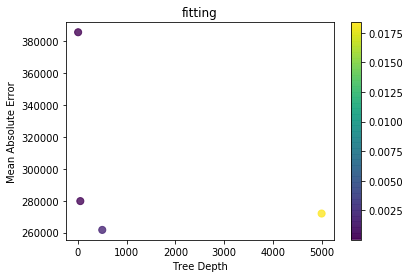

In [155]:
fig = plt.figure()
x = np.linspace(0, 2 * np.pi, 50)

tree_depth = [5, 50, 500, 5000]
MAE = [385696, 279794 , 261718, 271996]

plt.title('fitting')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error')


colour = np.arctan2(tree_depth , MAE)
plt.scatter(tree_depth, MAE, s = 50, c = colour, alpha = 0.8)
plt.colorbar()
plt.show()

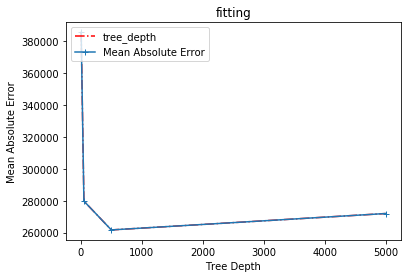

In [156]:
fig = plt.figure()
x = np.linspace(0, 2 * np.pi, 50)

x = [5, 50, 500, 5000]
y = [385696, 279794 , 261718, 271996]

plt.title('fitting')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error')

plt.plot(x, y, color = "red", linewidth = 1.5, linestyle = "-.", label = "tree_depth")
plt.plot(x, y, marker = '+', linestyle = '-', label = 'Mean Absolute Error')
plt.legend(loc = "upper left")
plt.show()

